In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import gymnasium as gym
from environment import trading_env
plt.rc('figure',titleweight='bold',titlesize='large',figsize=(15,6))
plt.rc('axes',labelweight='bold',labelsize='large',titleweight='bold',titlesize='large',grid=True)

2024-10-17 12:39:39.026850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 12:39:39.038360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 12:39:39.041439: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 12:39:39.051560: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 12:39:39.745602: W tensorflow/compiler/tf2

In [2]:
seed=np.linspace(0,2*np.pi,200)
y=2*np.sin(3*seed)+4
z=[]
for i in range(y.shape[0]-1):
    open=y[i]
    close=y[i+1]
    high=max(open,close)+0.2*np.random.randn(1)[0]
    low=min(open,close)-0.2*np.random.randn(1)[0]
    z.append([open,high,low,close])
z=pd.DataFrame(z,columns=['Open','High','Low','Close'])

In [3]:
gym.register(id='trading/trading_env',entry_point=trading_env)
env_maker=lambda:gym.make('trading/trading_env',df=z,window_size=2)
env=DummyVecEnv([env_maker])

In [4]:
model=A2C('MlpPolicy',env,verbose=1)
model.learn(total_timesteps=10000)

Using cpu device


/py_virtual/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(


------------------------------------
| time/                 |          |
|    fps                | 1196     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.02    |
|    explained_variance | -0.0779  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -6.49    |
|    value_loss         | 68.3     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1182     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.698   |
|    explained_variance | 0.0354   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 1.91     |
|    value_loss         | 9.25     |
-

/py_virtual/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(


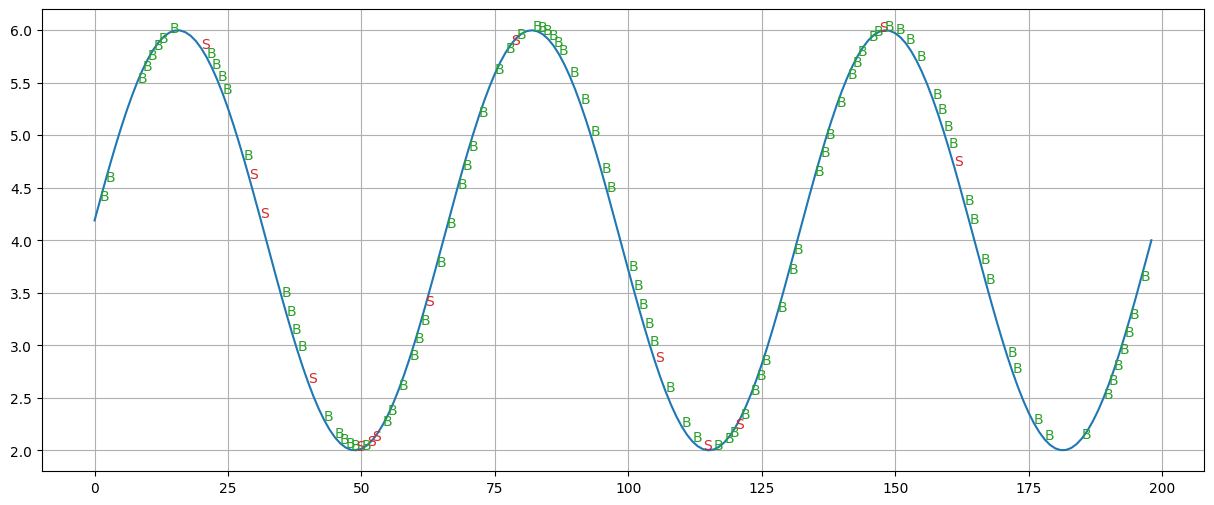

In [5]:
env=gym.make('trading/trading_env',df=z,window_size=2)
current_state,info=env.reset()
action_list=[]
while True:
    action,state=model.predict(current_state)
    action_list.append(action)
    current_state,reward,terminated,truncated,info=env.step(action)
    if terminated:
        break

fg=plt.figure()
ax=fg.add_subplot()
z['Close'].plot(ax=ax)
for i in range(len(action_list)):
    if action_list[i]==0:
        plt.text(i,z.iloc[i,3],'B',color='C2')
    elif action_list[i]==2:
        plt.text(i,z.iloc[i,3],'S',color='C3')